# 5 Modelling

## 5.1 Imports and Set Display

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
import re
import warnings
warnings.filterwarnings("ignore")

In [5]:
import time

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 5.2 Load Datasets
the dataset house_Jan26_2024.csv can be download from:
https://drive.google.com/file/d/1pSwTKZnzPmJz-CsIdi7SmnXwO6D-K9hI/view?usp=drive_link

In [8]:
# load datasets
house = pd.read_csv('../Data/house_Jan26_2024.csv', index_col=0)
house.head()

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,property_description,planning_jurisdiction,township,billing_class,land_classification,utilities,design_style,foundation_basement,exterior_wall,heat,air,type_and_use,physical_city,nearest_city,land_qualified,house_qualified
0,19,0.21,34500,1964.0,1,1828.0,1980.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,10.0,3,1,1714,20,81,7084,LO22 LONGVIEW GARDENS BLR,RA,RALEIGH,INDIVIDUALS,R,ALL,I,B,D,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
1,2694,0.30,22500,1961.0,1,1292.0,1985.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,13.0,3,1,1723,14,24,6984,LO150 WORTHDALE ADDN SE1,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,B,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
2,3021,0.28,19500,1959.0,1,1125.0,1959.0,1.0,1.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,15.0,3,0,1713,16,94,6543,LO97 WORTHDALE SE2,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,B,A,H,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
3,4929,0.30,17000,1963.0,1,1417.0,1985.0,1.0,1.5,1,27610.0,1974.0,1,6.21299,306.877319,7.2,11.0,3,1,1723,14,34,4102,LO31 WORTHDALE SE3,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,B,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
4,6064,0.13,1500,2006.0,1,1143.0,2006.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,-32.0,3,1,1713,6,38,443,LO118 RCMB BATTERY HEIGHTS BM2019-00378,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,Z,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes


In [9]:
house.columns

Index(['real_estate_id', 'deeded_acreage', 'total_sale_price', 'year_built',
       'units', 'heated_area', 'effective_year', 'story_height', 'bath',
       'recycled_units', 'physical_zip_code', 'total_sale_year',
       'total_sale_month', 'distance_nearest_city',
       'population_per_square_mile', 'unemployment_rate', 'age_sale', 'grade',
       'fireplace', 'PI_1', 'PI_2', 'PI_3', 'PI_4', 'property_description',
       'planning_jurisdiction', 'township', 'billing_class',
       'land_classification', 'utilities', 'design_style',
       'foundation_basement', 'exterior_wall', 'heat', 'air', 'type_and_use',
       'physical_city', 'nearest_city', 'land_qualified', 'house_qualified'],
      dtype='object')

In [10]:
house.shape

(326086, 39)

In [11]:
house.dtypes

real_estate_id                  int64
deeded_acreage                float64
total_sale_price                int64
year_built                    float64
units                           int64
heated_area                   float64
effective_year                float64
story_height                  float64
bath                          float64
recycled_units                  int64
physical_zip_code             float64
total_sale_year               float64
total_sale_month                int64
distance_nearest_city         float64
population_per_square_mile    float64
unemployment_rate             float64
age_sale                      float64
grade                           int64
fireplace                       int64
PI_1                            int64
PI_2                            int64
PI_3                            int64
PI_4                            int64
property_description           object
planning_jurisdiction          object
township                       object
billing_clas

## 5.3 Define Useful Functions.

In [12]:
def cross_validate_manual(data, estimator, test_p, n=5):
    train_r2 = []
    test_r2 = []
    train_mae = []
    test_mae = []
    train_rmse = []
    test_rmse = []
    train_length = int(np.floor(len(data)*(1-test_p)))
    res_train = pd.DataFrame(index=range(train_length))
    res_test = pd.DataFrame(index=range(len(data)-train_length))
    
    for i in range(n):
        shuffled = data.sample(len(data))
        X = shuffled.drop(['total_sale_price', 'real_estate_id'], axis=1)
        y = shuffled['total_sale_price']
        X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
        # separate continuous and categorical
        X_train_num = X_train.select_dtypes(['int64', 'float64'])
        X_test_num = X_test.select_dtypes(['int64', 'float64'])
        X_train_bool = X_train.select_dtypes(['bool'])
        X_test_bool = X_test.select_dtypes(['bool'])
        # only scale continuous
        scaler = StandardScaler()
        scaler.fit(X_train_num)
        X_train_num.iloc[:,:] = scaler.transform(X_train_num)
        X_test_num.iloc[:,:] = scaler.transform(X_test_num)
        
        # combine back
        X_train_final = pd.concat([X_train_num, X_train_bool], axis=1)
        X_test_final = pd.concat([X_test_num, X_test_bool], axis=1)

        est = estimator.fit(X_train_final, y_train)
        y_train_pred = est.predict(X_train_final)
        y_test_pred = est.predict(X_test_final)
        
        res_train['y_train_true_'+str(i+1)] = y_train.values
        res_train['y_train_predict_'+str(i+1)] = y_train_pred
        res_test['y_test_true_'+str(i+1)] = y_test.values
        res_test['y_test_predict_'+str(i+1)] = y_test_pred

        train_r2.append(r2_score(y_train, y_train_pred))
        test_r2.append(r2_score(y_test, y_test_pred))
        train_mae.append(mean_absolute_error(y_train, y_train_pred))
        test_mae.append(mean_absolute_error(y_test, y_test_pred))
        train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
   
            
    res_metrics = pd.DataFrame(index=range(n), data={'train_r2':train_r2, 'test_r2':test_r2,
                            'train_mae':train_mae, 'test_mae':test_mae,
                            'train_rmse':train_rmse, 'test_rmse':test_rmse})
    return res_train, res_test, res_metrics

In [13]:
def scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x = col, y = 'total_sale_price', data=data, alpha=0.5, ax=ax)
        ax.set(xlabel=col, ylabel='total_sale_price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)    #  set not visible about empty axes.

## 5.4 Hyperparameter Tunning of Gradient Boost Regressor

### 5.4.1 Setup Dataframe

In [14]:
house.head()

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,property_description,planning_jurisdiction,township,billing_class,land_classification,utilities,design_style,foundation_basement,exterior_wall,heat,air,type_and_use,physical_city,nearest_city,land_qualified,house_qualified
0,19,0.21,34500,1964.0,1,1828.0,1980.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,10.0,3,1,1714,20,81,7084,LO22 LONGVIEW GARDENS BLR,RA,RALEIGH,INDIVIDUALS,R,ALL,I,B,D,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
1,2694,0.30,22500,1961.0,1,1292.0,1985.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,13.0,3,1,1723,14,24,6984,LO150 WORTHDALE ADDN SE1,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,B,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
2,3021,0.28,19500,1959.0,1,1125.0,1959.0,1.0,1.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,15.0,3,0,1713,16,94,6543,LO97 WORTHDALE SE2,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,B,A,H,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
3,4929,0.30,17000,1963.0,1,1417.0,1985.0,1.0,1.5,1,27610.0,1974.0,1,6.21299,306.877319,7.2,11.0,3,1,1723,14,34,4102,LO31 WORTHDALE SE3,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,B,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes
4,6064,0.13,1500,2006.0,1,1143.0,2006.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,-32.0,3,1,1713,6,38,443,LO118 RCMB BATTERY HEIGHTS BM2019-00378,RA,RALEIGH,INDIVIDUALS,R,ALL,A,C,Z,A,A,ONE FAMILY,RALEIGH,RALEIGH,Yes,Yes


In [15]:
house = house.drop(['property_description',	'planning_jurisdiction', 'township', 'land_classification'], axis=1)

In [16]:
house_dummy = pd.get_dummies(house)

In [17]:
X = house_dummy.drop(['total_sale_price', 'real_estate_id'], axis=1)
y = house_dummy['total_sale_price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [19]:
X_train.shape, X_test.shape

((309781, 133), (16305, 133))

In [20]:
X_train.head()

,deeded_acreage,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
241508,0.84,1995.0,1,2669.0,1995.0,2.00,2.5,1,27607.0,2002.0,5,6.265998,789.237124,5.9,7.0,4,1,774,11,57,6260,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
157453,0.23,2005.0,1,4402.0,2005.0,1.88,3.5,1,27614.0,2018.0,10,8.997809,1274.418333,3.5,13.0,5,1,1729,4,54,1812,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
13130,0.15,2006.0,1,1886.0,2006.0,2.00,2.5,1,27610.0,2017.0,8,6.212990,1251.386199,3.9,11.0,2,1,1732,4,70,6844,False,False,False,True,False,False,True,False,False,False,False,Fa

In [21]:
X_train_num = X_train.select_dtypes(['int64', 'float64'])
X_test_num = X_test.select_dtypes(['int64', 'float64'])
X_train_bool = X_train.select_dtypes(['bool'])
X_test_bool = X_test.select_dtypes(['bool'])

In [22]:
# only scale continuous
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num.iloc[:,:] = scaler.transform(X_train_num)
X_test_num.iloc[:,:] = scaler.transform(X_test_num)

In [23]:
X_train_final = pd.concat([X_train_num, X_train_bool], axis=1)
X_test_final = pd.concat([X_test_num, X_test_bool], axis=1)

In [24]:
X_train_final.head()

,deeded_acreage,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
241508,0.404006,-0.081585,-0.074668,0.366261,-0.328426,0.840403,-0.111637,-0.030777,0.846927,-0.940984,-0.498358,0.080684,-1.052198,0.956489,-0.433981,0.130257,0.352463,-0.847954,0.601284,0.248206,0.439998,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
157453,-0.170164,0.427276,-0.074668,2.094863,0.341268,0.571506,1.541456,-0.030777,1.014510,0.621900,1.029187,0.826944,0.658627,-0.606665,-0.109712,1.274423,0.352463,1.005970,-0.539330,0.144483,-1.105572,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,Fa

### 5.4.2 RandomizedSearchCV

In [42]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'min_samples_split': [2, 4, 8, 10], 'min_samples_leaf': [1, 2, 4, 6]}

gb_regressor = GradientBoostingRegressor(random_state=42)
grid_search = RandomizedSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=10, verbose=2)
grid_search.fit(X_train_final, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 6, 'learning_rate': 0.2}


In [43]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_final)
y_test_pred = best_model.predict(X_test_final)

In [44]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.882713843854231 0.8942586701493718
MAE 40742.22009297772 40115.01913677585
RMSE 75297.3588298387 68644.23464996908


## 5.5 Exp_1 max_depth=5

### 5.5.1 Cross Validation Manually

In [25]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, min_samples_leaf=6, min_samples_split=4, random_state=42)

In [26]:
res_train_1, res_test_1, res_metrics_1 = cross_validate_manual(house_dummy, estimator, test_p=0.05, n=10)

In [27]:
res_metrics_1

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.921512,0.894524,34203.486631,35474.672396,61487.745958,71013.385755
1,0.921266,0.901807,34205.257249,34908.952850,61640.696553,67289.326243
2,0.920369,0.901448,34209.268863,35451.458923,61953.920673,68217.067551
3,0.920731,0.873796,34289.607161,36210.636060,61651.978637,80999.663424
4,0.921309,0.909989,34036.486242,34922.735485,61589.369407,65152.876463
5,0.920763,0.920586,34165.214904,34367.520686,61787.694376,61481.343122
6,0.921571,0.883207,34266.372132,34560.932517,61513.335428,73575.728909
7,0.921591,0.919780,34085.204043,34574.060361,61485.163665,61382.618291
8,0.921586,0.917854,34078.561221,34492.460440,61520.663769,61450.304964
9,0.920966,0.902181,34134.327573,35454.608942,61672.726514,68988.388382


### 5.5.2 Hyperparameter Table

In [143]:
hyperparameter_table = pd.read_csv('../Data/GB_hyperparameter_table.csv', index_col=0)
hyperparameter_table = hyperparameter_table.to_dict()
hyperparameter_table

{'Exp': {},
 'n_estimators': {},
 'max_depth': {},
 'learning_rate': {},
 'min_samples_leaf': {},
 'min_sample_split': {},
 'test%': {},
 'num of shuffle': {},
 'label_outlier': {},
 'Train_RMSE_mean': {},
 'Train_RMSE_std': {},
 'Test_RMSE_mean': {},
 'Test_RMSE_std': {}}

In [144]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 100, 5, 0.2, 6, 4, 5, 10, 'No',
                res_metrics_1['train_rmse'].mean(), res_metrics_1['train_rmse'].std(), 
                res_metrics_1['test_rmse'].mean(), res_metrics_1['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][1] = value
    
pd.DataFrame(hyperparameter_table)

,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,100,5,0.2,6,4,5,10,No,61630.329498,149.310906,67955.07031,6217.865315


### 5.5.3 Result Analysis             

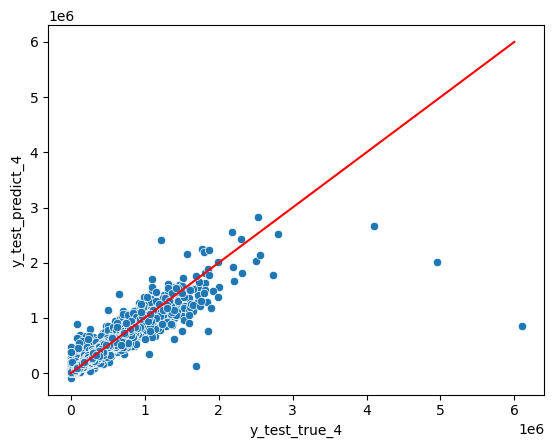

In [77]:
#shuffle4, largest test_rmse
sns.scatterplot(x='y_test_true_4', y='y_test_predict_4', data=res_test_1)
plt.plot([0,6*10**6], [0,6*10**6], color='red');

## 5.6 Exp_2 max_depth=4

### 5.6.1 Cross Validation Manually

In [30]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.2, min_samples_leaf=6, min_samples_split=4, random_state=42)

In [31]:
res_train_2, res_test_2, res_metrics_2 = cross_validate_manual(house_dummy, estimator, test_p=0.05, n=10)

In [32]:
res_metrics_2

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.904771,0.903336,36906.221114,37084.797877,67727.516142,68002.412346
1,0.903925,0.894579,37030.980708,37846.504513,68024.281064,71087.066055
2,0.903490,0.902332,37111.607169,37200.840987,68221.444539,67583.597575
3,0.904932,0.890851,36949.088840,38304.104988,67694.409206,71766.464527
4,0.904700,0.895734,37023.460663,37374.834760,67822.516604,69223.249227
5,0.904462,0.876908,36964.394522,37794.745988,67772.135687,78137.956444
6,0.903225,0.852863,37100.869567,38229.617750,68119.964791,87466.413826
7,0.903457,0.899235,37266.266626,37431.770456,68208.460922,69131.275501
8,0.903042,0.894159,36945.745787,37466.290509,68368.748027,70575.728584
9,0.906020,0.858682,37221.748720,37108.742783,67313.799093,81464.530218


### 5.6.2 Hyperparameter Table

In [145]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 100, 4, 0.2, 6, 4, 5, 10, 'No',
                res_metrics_2['train_rmse'].mean(), res_metrics_2['train_rmse'].std(), 
                res_metrics_2['test_rmse'].mean(), res_metrics_2['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][2] = value
    
pd.DataFrame(hyperparameter_table)

,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,100,5,0.2,6,4,5,10,No,61630.329498,149.310906,67955.07031,6217.865315
2,GradientBoostingRegressor,100,4,0.2,6,4,5,10,No,67927.327607,318.427468,73443.86943,6666.299887


### 5.6.3 Result Analysis             

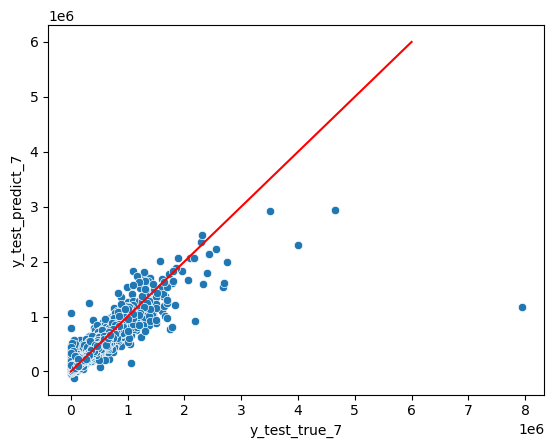

In [76]:
#shuffle7, largest test_rmse
sns.scatterplot(x='y_test_true_7', y='y_test_predict_7', data=res_test_2)
plt.plot([0,6*10**6], [0,6*10**6], color='red');

## 5.7 Exp_3 max_depth=3

### 5.7.1 Cross Validation Manually

In [34]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.2, min_samples_leaf=6, min_samples_split=4, random_state=42)

In [35]:
res_train_3, res_test_3, res_metrics_3 = cross_validate_manual(house_dummy, estimator, test_p=0.05, n=10)

In [36]:
res_metrics_3

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.880860,0.878877,40706.242270,40576.305908,75730.105649,76593.633845
1,0.882381,0.863406,40747.555173,40653.999913,75290.281829,80411.429374
2,0.880926,0.872234,40843.110922,40816.133010,75672.755675,79372.547039
3,0.881140,0.888919,41073.649140,41260.097183,75740.587190,71500.018789
4,0.882722,0.874187,40404.896592,41562.509392,75065.299467,79429.715709
5,0.882441,0.869029,40582.754557,41836.382564,75189.766588,80363.052719
6,0.881279,0.871242,40885.277477,41880.707617,75586.497287,79169.379507
7,0.882737,0.874597,40468.768492,41622.398023,75244.160537,75689.191099
8,0.883350,0.869989,40506.216242,40315.038587,74952.933822,78985.788029
9,0.882465,0.883348,40891.862193,41412.999937,75215.459607,75221.499800


### 5.7.2 Hyperparameter Table

In [146]:
param_names = list(hyperparameter_table.keys())
param_values = ['GradientBoostingRegressor', 100, 3, 0.2, 6, 4, 5, 10, 'No',
                res_metrics_3['train_rmse'].mean(), res_metrics_3['train_rmse'].std(), 
                res_metrics_3['test_rmse'].mean(), res_metrics_3['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][3] = value
    
pd.DataFrame(hyperparameter_table)

,Exp,n_estimators,max_depth,learning_rate,min_samples_leaf,min_sample_split,test%,num of shuffle,label_outlier,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,GradientBoostingRegressor,100,5,0.2,6,4,5,10,No,61630.329498,149.310906,67955.070310,6217.865315
2,GradientBoostingRegressor,100,4,0.2,6,4,5,10,No,67927.327607,318.427468,73443.869430,6666.299887
3,GradientBoostingRegressor,100,3,0.2,6,4,5,10,No,75368.784765,288.842947,77673.625591,2865.281230


### 5.7.3 Result Analysis              

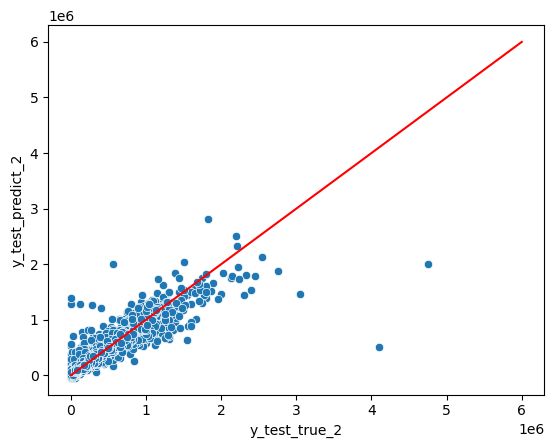

In [75]:
#shuffle2, largest test_rmse
sns.scatterplot(x='y_test_true_2', y='y_test_predict_2', data=res_test_3)
plt.plot([0,6*10**6], [0,6*10**6], color='red');

## 5.8 Model Performance Test

extract test houses

In [25]:
test_df = house_dummy[(house_dummy['real_estate_id']==445283)|(house_dummy['real_estate_id']==221174)|(house_dummy['real_estate_id']==445264)]

In [26]:
train_df = house_dummy[(house_dummy['real_estate_id']!=445283)&(house_dummy['real_estate_id']!=221174)&(house_dummy['real_estate_id']!=445264)]

In [27]:
train_df.head()

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
0,19,0.21,34500,1964.0,1,1828.0,1980.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,10.0,3,1,1714,20,81,7084,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
1,2694,0.30,22500,1961.0,1,1292.0,1985.0,1.0,2.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,13.0,3,1,1723,14,24,6984,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
2,3021,0.28,19500,1959.0,1,1125.0,1959.0,1.0,1.0,1,27610.0,1974.0,1,6.21299,306.877319,7.2,15.0,3,0,1713,16,94,6543,False,False,False,True

In [28]:
X_train = train_df.drop(['total_sale_price','real_estate_id'], axis=1)
y_train = train_df['total_sale_price']

In [29]:
X_train_num = X_train.select_dtypes(['int64', 'float64'])
X_train_bool = X_train.select_dtypes(['bool'])

In [30]:
# only scale continuous
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num.iloc[:,:] = scaler.transform(X_train_num)

In [31]:
X_train_final = pd.concat([X_train_num, X_train_bool], axis=1)

In [32]:
X_train_final.head()

,deeded_acreage,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
0,-0.190121,-1.659293,-0.075054,-0.472882,-1.332545,-1.400404,-0.938588,-0.031488,0.919293,-3.674063,-1.719632,0.066966,-2.751895,1.802702,-0.271753,-1.014479,0.352174,0.977195,2.068669,1.077920,0.726304,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
1,-0.104675,-1.811973,-0.075054,-1.007995,-0.997778,-1.400404,-0.938588,-0.031488,0.919293,-3.674063,-1.719632,0.066966,-2.751895,1.802702,-0.109523,-1.014479,0.352174,0.994664,1.090862,-0.893339,0.691554,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,Fa

In [33]:
model =  GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, min_samples_leaf=6, min_samples_split=4, random_state=42)
model.fit(X_train_final, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=6,
                          min_samples_split=4, random_state=42)

In [47]:
cv_results = cross_validate(model, X_train_final, y_train, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

In [48]:
cv_results

{'fit_time': array([337.35930276, 339.25054097, 339.89109969, 340.15669799,
        330.93004632]),
 'score_time': array([0.51637793, 0.39058471, 0.32809329, 0.31246805, 0.51551652]),
 'test_score': array([-41951.87707653, -61822.86408857, -37829.05253757, -39235.64366545,
        -33080.75577497])}

In [49]:
np.mean(-1*cv_results['test_score'])

42784.038628617025

### 5.8.1 Sale Price Test_1

<font color=red>take out hui's house as test set and use all others as train set

In [67]:
hui_house = test_df[test_df['real_estate_id']==445283]
hui_house

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162211,445283,0.17,484000,2018.0,1,3132.0,2018.0,2.0,3.5,1,27519.0,2018.0,7,8.75332,1274.418333,3.5,0.0,5,0,734,2,65,2606,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [68]:
hui_house.loc[:, 'total_sale_year'] = 2023
hui_house.loc[:, 'total_sale_month'] = 12
hui_house.loc[:, 'population_per_square_mile'] = 1397.79235
hui_house.loc[:, 'unemployment_rate'] =3.4
hui_house.loc[:, 'age_sale'] = 5
hui_house

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162211,445283,0.17,484000,2018.0,1,3132.0,2018.0,2.0,3.5,1,27519.0,2023.0,12,8.75332,1397.79235,3.4,5.0,5,0,734,2,65,2606,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [69]:
X_test = hui_house.drop(['total_sale_price','real_estate_id'], axis=1)
y_test = hui_house['total_sale_price']

In [70]:
X_test_num = X_test.select_dtypes(['int64', 'float64'])
X_test_bool = X_test.select_dtypes(['bool'])

In [71]:
X_test_num.iloc[:,:] = scaler.transform(X_test_num)
X_test_final = pd.concat([X_test_num, X_test_bool], axis=1)

In [72]:
y_test_pred = model.predict(X_test_final)

In [73]:
print(f"The Sale Price for Hui's House in 2018 is {y_test.iloc[0]}")
print(f"The Predicted Sale Price for Hui's House in 2023 is {y_test_pred[0]}")

The Sale Price for Hui's House in 2018 is 484000
The Predicted Sale Price for Hui's House in 2023 is 777361.2574860314


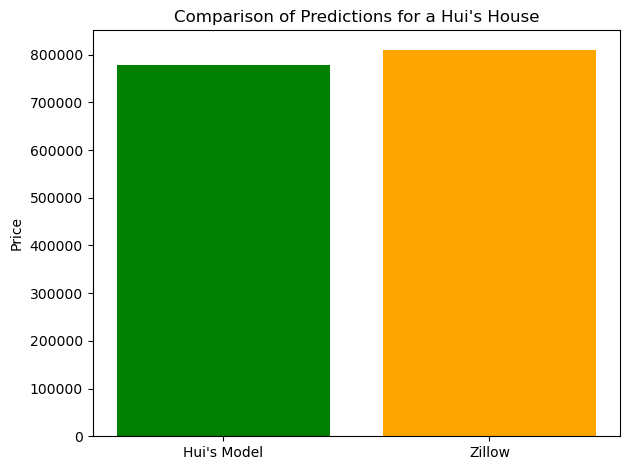

In [93]:
model_prediction = y_test_pred[0]
zillow_prediction = 810500

# Bar chart
labels = ["Hui's Model", "Zillow"]
values = [model_prediction, zillow_prediction]

plt.bar(labels, values, color=['green', 'orange'])
plt.ylabel('Price')
plt.title("Comparison of Predictions for a Hui's House")
plt.tight_layout()
plt.show()

<font color=red>it works well on past sale price, BUT can it be used for price forecast?

### 5.8.2 Sale Price Test_2

<font color=red>randomly select one house recently sold

In [46]:
recent_sale_1 = test_df[test_df['real_estate_id']==221174]
recent_sale_1

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
239433,221174,0.14,293500,1996.0,1,2506.0,1996.0,1.5,2.0,1,27519.0,2015.0,10,8.75332,1193.520571,4.7,19.0,4,1,745,3,11,5369,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


<font color=red>update information with recent sale data               
these information can be find from https://services.wake.gov/realestate/Account.asp?id=0221174

In [47]:
recent_sale_1.loc[:, 'total_sale_price'] = 646000
recent_sale_1.loc[:, 'total_sale_year'] = 2023
recent_sale_1.loc[:, 'total_sale_month'] = 11
recent_sale_1.loc[:, 'population_per_square_mile'] = 1397.79235
recent_sale_1.loc[:, 'unemployment_rate'] =3.4
recent_sale_1.loc[:, 'age_sale'] = 27
recent_sale_1

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
239433,221174,0.14,646000,1996.0,1,2506.0,1996.0,1.5,2.0,1,27519.0,2023.0,11,8.75332,1397.79235,3.4,27.0,4,1,745,3,11,5369,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [48]:
X_test = recent_sale_1.drop(['total_sale_price','real_estate_id'], axis=1)
y_test = recent_sale_1['total_sale_price']

In [49]:
X_test_num = X_test.select_dtypes(['int64', 'float64'])
X_test_bool = X_test.select_dtypes(['bool'])

In [50]:
X_test_num.iloc[:,:] = scaler.transform(X_test_num)
X_test_final = pd.concat([X_test_num, X_test_bool], axis=1)

In [51]:
y_test_pred = model.predict(X_test_final)

In [52]:
print(f"The True Sale Price for House with ID 221174 in Nov 2023 is {y_test.iloc[0]}")
print(f"The Predicted Sale Price for House with ID 221174 in Nov 2023 is {y_test_pred[0]}")

The True Sale Price for House with ID 221174 in Nov 2023 is 646000
The Predicted Sale Price for House with ID 221174 in Nov 2023 is 568528.4578446947


### 5.8.3 Sale Price Test_3

<font color=red>another example

In [53]:
recent_sale_2 = test_df[test_df['real_estate_id']==445264]
recent_sale_2

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162199,445264,0.15,550500,2018.0,1,3594.0,2018.0,2.0,3.5,1,27519.0,2018.0,5,8.75332,1274.418333,3.5,0.0,5,0,734,2,56,7103,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


<font color=red>update information with recent sale data                  
these information can be find from https://services.wake.gov/realestate/Account.asp?id=0445264

In [54]:
recent_sale_2.loc[:, 'total_sale_price'] = 945000
recent_sale_2.loc[:, 'total_sale_year'] = 2023
recent_sale_2.loc[:, 'total_sale_month'] = 9
recent_sale_2.loc[:, 'population_per_square_mile'] = 1397.79235
recent_sale_2.loc[:, 'unemployment_rate'] =3.4
recent_sale_2.loc[:, 'age_sale'] = 5
recent_sale_2

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162199,445264,0.15,945000,2018.0,1,3594.0,2018.0,2.0,3.5,1,27519.0,2023.0,9,8.75332,1397.79235,3.4,5.0,5,0,734,2,56,7103,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [55]:
X_test = recent_sale_2.drop(['total_sale_price','real_estate_id'], axis=1)
y_test = recent_sale_2['total_sale_price']

In [56]:
X_test_num = X_test.select_dtypes(['int64', 'float64'])
X_test_bool = X_test.select_dtypes(['bool'])

In [57]:
X_test_num.iloc[:,:] = scaler.transform(X_test_num)
X_test_final = pd.concat([X_test_num, X_test_bool], axis=1)

In [58]:
y_test_pred = model.predict(X_test_final)

In [59]:
print(f"The True Sale Price for House with ID 445264 in Sept 2023 is {y_test.iloc[0]}")
print(f"The Predicted Sale Price for House with ID 445264 in Sept 2023 is {y_test_pred[0]}")

The True Sale Price for House with ID 445264 in Sept 2023 is 945000
The Predicted Sale Price for House with ID 445264 in Sept 2023 is 895752.4660915204


## 5.9 Feature Importance

In [73]:
feature_importance = model.feature_importances_
feature_importance = 100*(feature_importance/feature_importance.max())
sorted_index = np.argsort(feature_importance)[-10:]
pos = np.arange(10) + 0.5

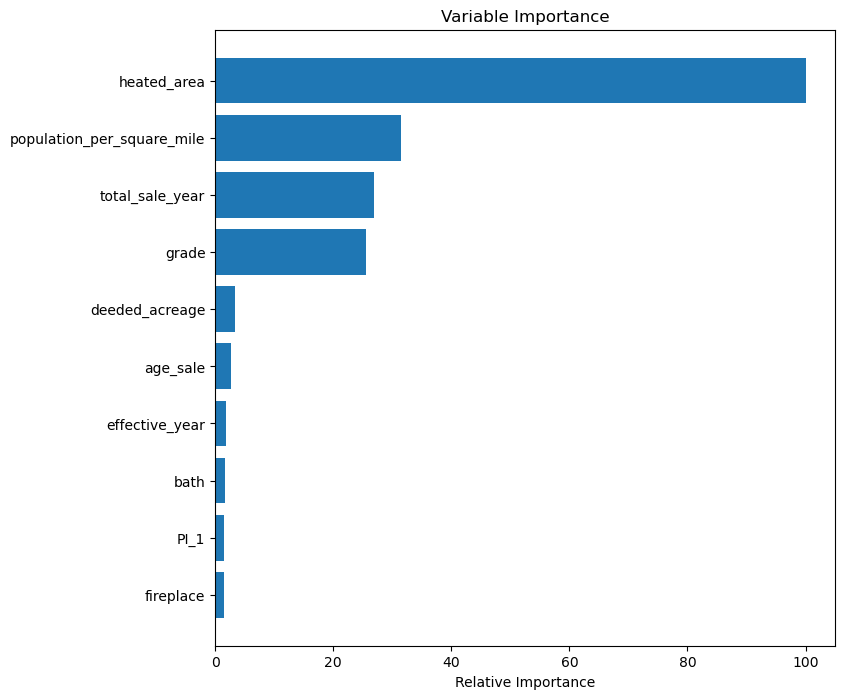

In [74]:
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_index])
plt.yticks(pos, X_train_final.columns[sorted_index])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## 5.10 Scenarios Test

### 5.10.1 Scenario 1, add 5% more heated area

In [75]:
hui_house = test_df[test_df['real_estate_id']==445283]
hui_house

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162211,445283,0.17,484000,2018.0,1,3132.0,2018.0,2.0,3.5,1,27519.0,2018.0,7,8.75332,1274.418333,3.5,0.0,5,0,734,2,65,2606,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [76]:
hui_house.loc[:, 'total_sale_year'] = 2023
hui_house.loc[:, 'total_sale_month'] = 12
hui_house.loc[:, 'population_per_square_mile'] = 1397.79235
hui_house.loc[:, 'unemployment_rate'] =3.4
hui_house.loc[:, 'age_sale'] = 5
hui_house.loc[:, 'heated_area'] = 3132.0*1.05
hui_house

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162211,445283,0.17,484000,2018.0,1,3288.6,2018.0,2.0,3.5,1,27519.0,2023.0,12,8.75332,1397.79235,3.4,5.0,5,0,734,2,65,2606,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [77]:
X_scene_1 = hui_house.drop(['total_sale_price','real_estate_id'], axis=1)

In [78]:
X_scene_1_num = X_scene_1.select_dtypes(['int64', 'float64'])
X_scene_1_bool = X_scene_1.select_dtypes(['bool'])

In [79]:
X_scene_1_num.iloc[:,:] = scaler.transform(X_scene_1_num)
X_scene_1_final = pd.concat([X_scene_1_num, X_scene_1_bool], axis=1)

In [80]:
y_scene_1_pred = model.predict(X_scene_1_final)

In [81]:
print(f"The Predicted Sale Price for Hui's House before increasing heated area by 5% is {model_prediction}")
print(f"The Predicted Sale Price for Hui's House after increasing heated area by 5% is {y_scene_1_pred[0]}")

The Predicted Sale Price for Hui's House before increasing heated area by 5% is 777361.2574860314
The Predicted Sale Price for Hui's House after increasing heated area by 5% is 798438.470136152


### 5.10.2 Scenario 2, add 1 more bathroom

In [82]:
hui_house = test_df[test_df['real_estate_id']==445283]
hui_house

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162211,445283,0.17,484000,2018.0,1,3132.0,2018.0,2.0,3.5,1,27519.0,2018.0,7,8.75332,1274.418333,3.5,0.0,5,0,734,2,65,2606,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [83]:
hui_house.loc[:, 'total_sale_year'] = 2023
hui_house.loc[:, 'total_sale_month'] = 12
hui_house.loc[:, 'population_per_square_mile'] = 1397.79235
hui_house.loc[:, 'unemployment_rate'] =3.4
hui_house.loc[:, 'age_sale'] = 5
hui_house.loc[:, 'bath'] = 4.5
hui_house

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,effective_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,grade,fireplace,PI_1,PI_2,PI_3,PI_4,billing_class_CORPORATION,billing_class_EXEMPT,billing_class_HOA,billing_class_INDIVIDUALS,billing_class_LIFE ESTATE,billing_class_PUBLIC SERVICE,utilities_ALL,utilities_E,utilities_G,utilities_GE,utilities_S,utilities_SE,utilities_SG,utilities_SGE,utilities_W,utilities_WE,utilities_WG,utilities_WGE,utilities_WS,utilities_WSE,utilities_WSG,design_style_A,design_style_B,design_style_C,design_style_D,design_style_E,design_style_F,design_style_G,design_style_H,design_style_I,design_style_J,design_style_K,design_style_L,design_style_M,design_style_N,design_style_O,foundation_basement_A,foundation_basement_B,foundation_basement_C,exterior_wall_A,exterior_wall_B,exterior_wall_C,exterior_wall_D,exterior_wall_E,exterior_wall_F,exterior_wall_G,exterior_wall_H,exterior_wall_I,exterior_wall_J,exterior_wall_K,exterior_wall_L,exterior_wall_N,exterior_wall_O,exterior_wall_Q,exterior_wall_R,exterior_wall_X,exterior_wall_Y,exterior_wall_Z,heat_A,heat_G,heat_H,heat_I,heat_J,heat_L,air_A,air_G,air_H,type_and_use_FOUR FAMILY,type_and_use_ONE FAMILY,type_and_use_THREE FAMILY,type_and_use_TWO FAMILY,physical_city_ANGIER,physical_city_APEX,physical_city_CARY,physical_city_CLAYTON,physical_city_CREEDMOOR,physical_city_DURHAM,physical_city_FUQUAY VARINA,physical_city_GARNER,physical_city_HOLLY SPRINGS,physical_city_KNIGHTDALE,physical_city_MORRISVILLE,physical_city_NEW HILL,physical_city_RALEIGH,physical_city_ROLESVILLE,physical_city_WAKE FOREST,physical_city_WENDELL,physical_city_WILLOW SPRING,physical_city_YOUNGSVILLE,physical_city_ZEBULON,nearest_city_ANGIER,nearest_city_APEX,nearest_city_CARY,nearest_city_CLAYTON,nearest_city_CREEDMOOR,nearest_city_DURHAM,nearest_city_FUQUAY VARINA,nearest_city_GARNER,nearest_city_HOLLY SPRINGS,nearest_city_KNIGHTDALE,nearest_city_NEW HILL,nearest_city_RALEIGH,nearest_city_ROLESVILLE,nearest_city_WAKE FOREST,nearest_city_WENDELL,nearest_city_WILLOW SPRING,nearest_city_YOUNGSVILLE,nearest_city_ZEBULON,land_qualified_No,land_qualified_Yes,house_qualified_No,house_qualified_Yes
162211,445283,0.17,484000,2018.0,1,3132.0,2018.0,2.0,4.5,1,27519.0,2023.0,12,8.75332,1397.79235,3.4,5.0,5,0,734,2,65,2606,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [84]:
X_scene_2 = hui_house.drop(['total_sale_price','real_estate_id'], axis=1)

In [85]:
X_scene_2_num = X_scene_2.select_dtypes(['int64', 'float64'])
X_scene_2_bool = X_scene_2.select_dtypes(['bool'])

In [86]:
X_scene_2_num.iloc[:,:] = scaler.transform(X_scene_2_num)
X_scene_2_final = pd.concat([X_scene_2_num, X_scene_2_bool], axis=1)

In [87]:
y_scene_2_pred = model.predict(X_scene_2_final)

In [88]:
print(f"The Original Sale Price for Hui's House is {model_prediction}")
print(f"The Predicted Sale Price for Hui's House after adding 1 more bathroom is {y_scene_2_pred[0]}")

The Original Sale Price for Hui's House is 777361.2574860314
The Predicted Sale Price for Hui's House after adding 1 more bathroom is 777361.2574860314


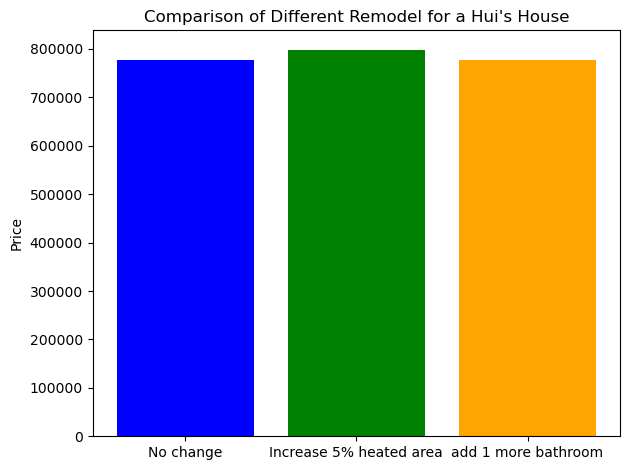

In [92]:
# Bar chart
labels = ["No change", "Increase 5% heated area", 'add 1 more bathroom']
values = [model_prediction, y_scene_1_pred[0], y_scene_2_pred[0]]

plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.ylabel('Price')
plt.title("Comparison of Different Remodel for a Hui's House")
plt.tight_layout()
plt.show()

## 5.11 Output

In [147]:
pd.DataFrame(hyperparameter_table).to_csv('../Data/GB_hyperparameter_table_Jan26_2024.csv')

## 5.12 Summary

1. Based on the model performance test, we can find the model performs very well for house price less than 3 million, for house price higher than 3 million, the predictive ability is weak.  
3. The model also shows some extent of ability for house price prediction before sale, BUT NOT stong. for house ID221174, the sale price on Nov 2023 is 646000, model predicted is 568528, difference roughly 80000 dollar. For house ID445264, the sale price on Sept 2023 is 945000, model predicted is 895752, difference roughly 50000 dollar.
7. I think the main reason for this:
   
   first, this model can not be used for price house prediction for a future time, unless be fed with house price data of that year.  
   second, house price prediction is a very complex and difficult project and needs lots of accurate data especially most recent econoimc data and market data, the economic data used for this peoject is not updated and cannot reflect the real market situations.          
   third, streaming data i.e. continuous flow of data that is generated, processed, and made available for real-time house transaction will be very helpful for this model.

## 5.13 Future Work 

1. incorporating more recent data into the training set could be beneficial, as it may capture evolving trends and market dynamics that impact house prices. 

2. exploring feature engineering techniques or introducing new relevant features, such as economic indicators, neighborhood developments, or seasonality factors, could improve the model's ability to adapt to changing conditions. 

3. Fine-tuning hyperparameters of the Gradient Boosting Regressor or experimenting with alternative algorithms might also be considered to optimize predictive accuracy. 

4. Conducting a thorough analysis of the model's residuals and identifying patterns specific to recent sales could offer insights into areas where the model may need refinement. 

5. combining predictions from multiple models may provide a more robust and accurate prediction for house sales.